In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
# !pip install TextBlob
# !pip install Wordcloud
# !pip install emoji

In [ ]:
#sentiment analysis

In [5]:
comments = pd.read_csv("UScomments.csv",error_bad_lines=False)

C:\Users\dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
C:\Users\dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [7]:
comments.shape

(691400, 4)

In [8]:
comments.isna().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [9]:
comments.dropna(inplace = True)

In [10]:
from textblob import TextBlob

In [11]:
#sentiment of the message
TextBlob("trending 😉").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [12]:
#and its polarity
TextBlob("trending 😉").sentiment.polarity

0.0

In [13]:
#list of polarity of evry comments
polarity = []
for c in comments["comment_text"]:
    try:
        polarity.append(TextBlob(c).sentiment.polarity)
    except:
        polarity.append(0)

In [14]:
#checking the polarity
polarity[0:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8, -0.13571428571428573]

In [15]:
#adding the polarity to the DataFrame
comments["polarity"] = polarity

In [17]:
comments.head(15)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


In [19]:
#now lets create a word cloud of sentences with positive and negative comment
#using the polarity 

comments[comments["polarity"]==1]

#these are the positive comments

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
325,sjlHnJvXdQs,This is awesome. 1:20 XDDDDDDDDD,0,0,1.0
416,cMKX2tE5Luk,BEST MOVIE EVER!!!,0,0,1.0
433,cMKX2tE5Luk,Power is the disease. Care is the cure. Keep...,0,0,1.0
447,cMKX2tE5Luk,The greatest movie about the greatest movie.,0,0,1.0
469,cMKX2tE5Luk,It's Harry guys he's Spiderman best friend,0,0,1.0


In [25]:
#all the positive comments
pos_comment = comments[comments["polarity"] == 1]

In [28]:
#all the negeative comments
neg_comment = comments[comments["polarity"] == -1]

In [29]:
neg_comment.head()

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


In [30]:
from wordcloud import WordCloud, STOPWORDS

In [31]:
#joining all the negeative comments
total_negative_comments = ' '.join(neg_comment["comment_text"])

(-0.5, 399.5, 199.5, -0.5)

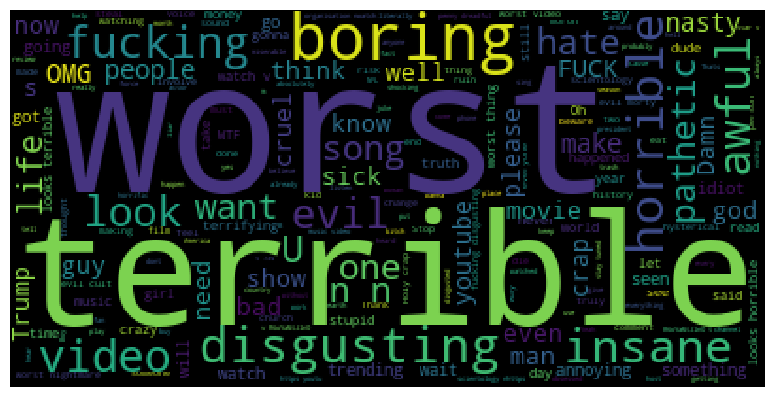

In [40]:
#negeative wordcloud
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_negative_comments)
plt.figure(figsize=(15,5),dpi = 100)
plt.imshow(wordcloud)
plt.axis("off")

In [41]:
#joining all the positve comments
total_positive_comments = " ".join(pos_comment["comment_text"])

(-0.5, 399.5, 199.5, -0.5)

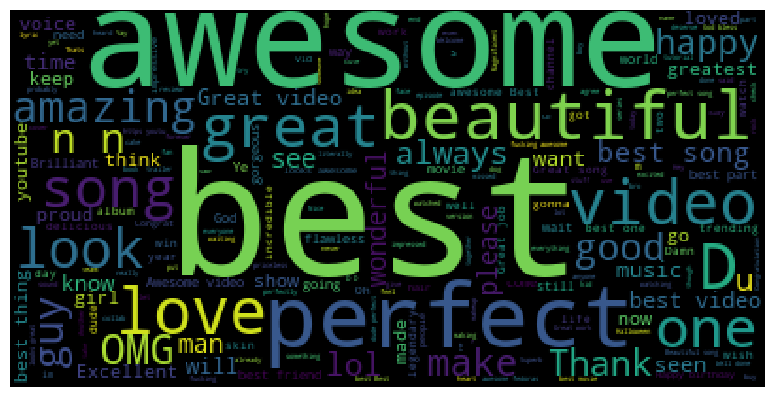

In [44]:
#positve wordcloud
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_positive_comments)
plt.figure(figsize = (15,5), dpi = 100)
plt.imshow(wordcloud)
plt.axis("off")

In [45]:
#!pip install emoji

In [46]:
import emoji

In [47]:
#unicode for emoji
print("\U0001F600")

😀


In [48]:
comments.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [49]:
#we have to extract the emoji from the text using the unicode
cmnt = "trending 😉"

In [50]:
#extracting the emoji using emoji modules unicode method
[c for c in cmnt if c in emoji.UNICODE_EMOJI_ENGLISH]

['😉']

In [52]:
#extracting the emoji from all the comments in comments_text
emoji_list = []
for c in comments["comment_text"]:
    for char in c:
        if char in emoji.UNICODE_EMOJI_ENGLISH:
            emoji_list.append(char)

In [54]:
len(emoji_list)

294549

In [57]:
#countter will help in finding the count of every emojis 
from collections import Counter

In [59]:
Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [71]:
Counter(emoji_list).most_common()[0]

('😂', 36987)

In [73]:
#list of the top 10 emojis
emo = [Counter(emoji_list).most_common(10)[i][0] for i in range(10)]

In [74]:
#list of the frequencies of those emojis
freqs = [Counter(emoji_list).most_common(10)[i][1] for i in range(10)]

In [75]:
emo

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [76]:
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [77]:
# import plotly as go

In [78]:
# from plotly.offline import iplot

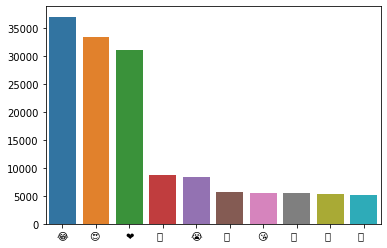

In [84]:
sns.barplot(x=emo,y=freqs)

In [2]:
import os

In [3]:
path = r"D:\doc\Udemy Data analysis Data\Youtube_project_shan_singh\additional_data"

In [4]:
files = os.listdir(path)

In [5]:
csv_files = [files[i] for i in range(0,len(files),2)]

In [6]:
full_df = pd.DataFrame()

for file in csv_files:
    current_df = pd.read_csv(path + "/" + file,encoding = "iso-8859-1",error_bad_lines=False)
    
    current_df["country"] = file.split(".")[0][0:2]
    full_df = pd.concat([full_df,current_df])

C:\Users\dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA


In [9]:
full_df["category_id"].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [9]:
full_df.shape

(375942, 17)

In [11]:
cat = pd.read_csv(r"D:\doc\Udemy Data analysis Data\Youtube_project_shan_singh/category_file.txt",sep = ":")

In [12]:
cat.head(2)

,Category_id Category_name
1,Film & Animation
2,Autos & Vehicles


In [13]:
cat.reset_index(inplace = True)

In [14]:
cat.columns = ['category_id','Category_name']

In [15]:
cat.head()

,category_id,Category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [16]:
cat.set_index("category_id",inplace = True)    

In [17]:
cat.head()

,Category_name
category_id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports


In [18]:
dct = cat.to_dict()

In [25]:
full_df["category_name"] = full_df["category_id"].map(dct["Category_name"])

In [26]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,CA,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,CA,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,CA,Music


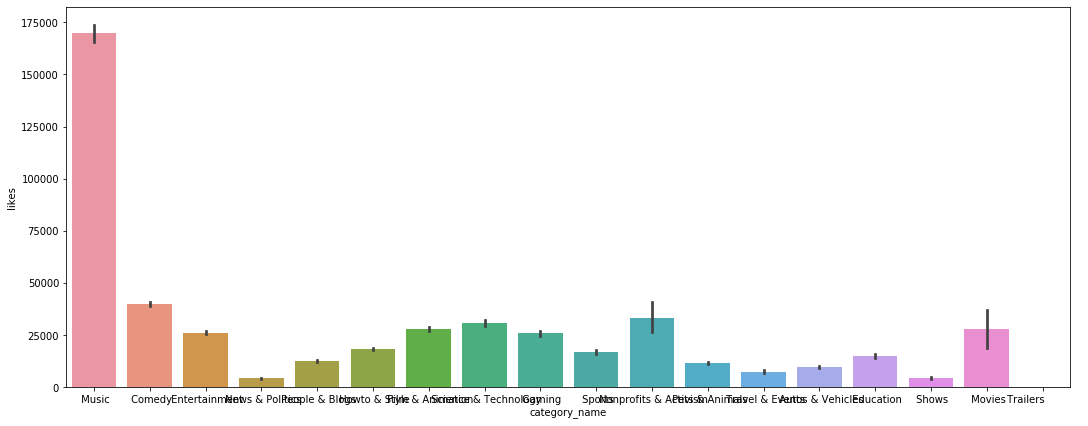

In [32]:
plt.figure(figsize=(18,7))
sns.barplot(x="category_name",y="likes",data=full_df)

<Figure size 1296x504 with 0 Axes>

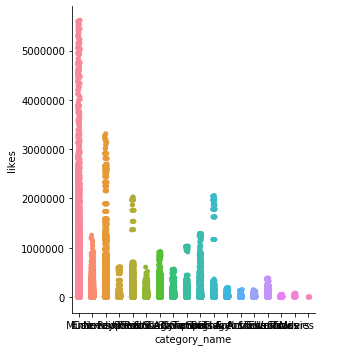

In [33]:
plt.figure(figsize=(18,7))
sns.catplot(data=full_df,x="category_name",y="likes")

In [34]:
df = full_df.copy()

In [35]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name'],
      dtype='object')

In [37]:
df[['views', 'likes', 'dislikes', 'comment_count']]

,views,likes,dislikes,comment_count
0,17158579,787425,43420,125882
1,1014651,127794,1688,13030
2,3191434,146035,5339,8181
3,2095828,132239,1989,17518
4,33523622,1634130,21082,85067
...,...,...,...,...
40944,1685609,38160,1385,2657
40945,1064798,60008,382,3936
40946,1066451,48068,1032,3992
40947,5660813,192957,2846,13088


In [38]:
df["like_rate"] = (df["likes"]/df["views"])*100

In [39]:
df["like_rate"]

0         4.589104
1        12.594873
2         4.575843
3         6.309630
4         4.874563
           ...    
40944     2.263870
40945     5.635623
40946     4.507286
40947     3.408645
40948     3.464728
Name: like_rate, Length: 375942, dtype: float64

In [40]:
df["dislike_rate"] = (df["dislikes"]/df["views"])*100
df["comment_count_rate"] = (df["comment_count"]/df["views"])*100

In [41]:
df[["dislike_rate","comment_count_rate"]]

,dislike_rate,comment_count_rate
0,0.253051,0.733639
1,0.166363,1.284185
2,0.167292,0.256342
3,0.094903,0.835851
4,0.062887,0.253752
...,...,...
40944,0.082166,0.157628
40945,0.035875,0.369648
40946,0.096770,0.374326
40947,0.050275,0.231204


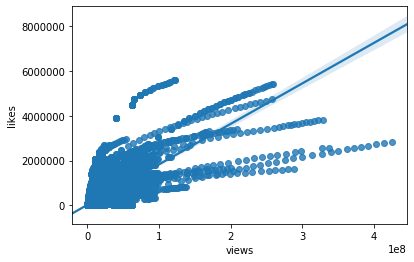

In [44]:
sns.regplot(data=df,x="views",y = "likes")

In [48]:
df[['views','likes','dislikes']].corr()

,views,likes,dislikes
views,1.000000,0.777796,0.421653
likes,0.777796,1.000000,0.453710
dislikes,0.421653,0.453710,1.000000


In [54]:
df.groupby("channel_title")["video_id"].count().sort_values(ascending=False)

channel_title
The Late Show with Stephen Colbert    984
WWE                                   804
Late Night with Seth Meyers           773
VikatanTV                             763
TheEllenShow                          743
                                     ... 
LIGHTS - 001 jrny                       1
bangtanist                              1
LIGAMX Femenil                          1
LIGA COLOMBIANA OFICIAL                 1
Pavel Sidorik TV                        1
Name: video_id, Length: 37824, dtype: int64

In [59]:
df.groupby("channel_title").aggregate({"likes":"sum"}).sort_values("likes",ascending=False)

,likes
channel_title,
ibighit,776812043
Marvel Entertainment,311432064
ChildishGambinoVEVO,290475817
TaylorSwiftVEVO,213177965
PewDiePie,208786515
...,...
å§« ch,0
TOP 5NCO,0
N&N Signs | NN Signs,0
